# Part II - Impact of  Characteristics of trip data on Duration of trip

## by Badreddine Mouttaqui

## Investigation Overview


> In this investigation, I will look at the characteristics of trip data that could be used to predict the duration of the trip. The main focus was on the five features : age, user type, , gender and start_week.


## Dataset Overview

This dataset includes records of individual rides made in a bike-sharing system covering the greater San Francisco Bay area in Feb-2019. 

The features of the dataset after the preliminary wrangling :

        - duration_sec.
        - start_time.
        - end_time.
        - user_type : Subscriber & Customer.
        - member_birth_year.                
        - member_gender : Male, Female & Other                     

Besides, I created new columns from given columns:

        - age : derived from the member_birth_year
        - start_hour: to store hour number from start_time.
        - end_hour: to store hour number from end_time.
        - start_weekday: to store week day number from start_time.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgb_clean.csv')
df.head()

,duration_sec,start_time,end_time,user_type,member_gender,age,start_weekday,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Customer,Male,38.0,3,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,Customer,NaN,NaN,3,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Customer,Male,50.0,3,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Subscriber,Other,33.0,3,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Subscriber,Male,48.0,3,23,0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## How does the duration of trips vary ?

The main thing I want to explore is how the trip duration distributed. From part I, we saw that was a long tail in the distribution, so we choose the plot of duration_sec on a logartithmic scale.

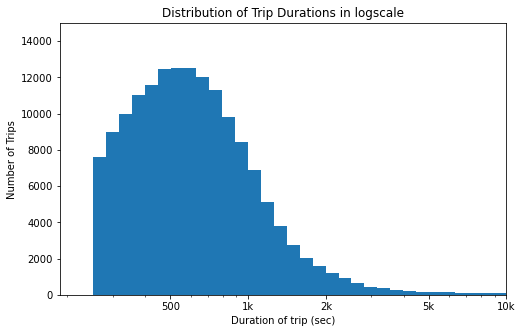

In [3]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations in logscale')
plt.xlabel('Duration of trip (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

The chart above indicates that duration_sec is a left-skewed distribution. 

Most of trips took less than 2000 seconds (around 30min).

The Peak of the distribution varies between between 10-12 minutes of use (600 to 700seconds)


## How does the average trip duration vary between customers and subscribers during weekdays ? 

The main thing I want to explore is how the average trip duration vary between customers and subscribers during weekdays. 




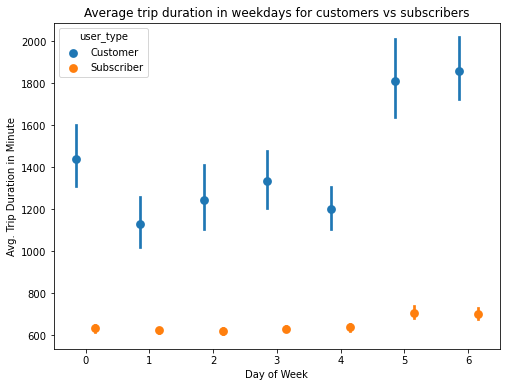

In [4]:
plt.figure(figsize = [8, 6])
sns.pointplot(data=df, x='start_weekday', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.title('Average trip duration in weekdays for customers vs subscribers')
plt.show()

We can state that subscribers take shorter trips compared to customers all week long & use the bike system in a efficient way (being near the average from Monday-Friday) . 

Also both user types have increase their trip duration over weekends. 

## How does the trip duration distribution vary between customers and subscribers accross gender? 

The main thing I want to explore in this part of the analysis is how does the trip duration distribution vary between customers and subscribers accross gender.



<Figure size 720x720 with 0 Axes>

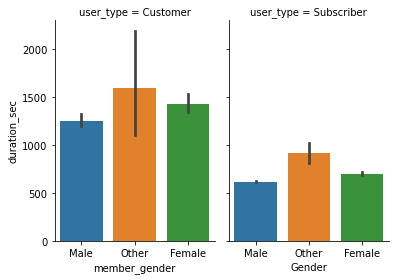

In [5]:
plt.figure(figsize = [10, 10])
sns.catplot(x = "member_gender", y = "duration_sec", col = "user_type",data = df, kind = "bar",
                height=4, aspect=.7)
plt.xlabel('Gender');
plt.ylabel('duration of trip (in seconds)')
plt.show();


This investigation shows clearly that customers have a higher mean trip duration across all genders.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Fordgobike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Fordgobike.ipynb to slides
[NbConvertApp] Writing 615784 bytes to Part_II_slide_deck_Fordgobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Fordgobike.slides.html
Use Control-C to stop this server
